<a href="https://colab.research.google.com/github/miquelyosafat/PROGRAM_SKRIPSI_MIQUEL_YOSAFAT_TEXT_CLUSTERING/blob/main/SKRIPSI_MIGUEL_TEXT_CLUSTERING_FINAL_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORT LIBRARIES***

In [ ]:
# Import libraries
!pip install nltk # sering digunakan dalam pemrosesan bahasa alami (NLP) di Python.
import pandas as pd #kamus yang digunakan untuk manipulasi dan analisis data tabular, termasuk dalam bentuk DataFrame.
import numpy as np #yang digunakan untuk komputasi numerik dalam Python.
import seaborn as sns
import matplotlib.pyplot as plt #visualisasi data
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
nltk.download('punkt') #punkt adalah data yang digunakan untuk tokenisasi teks (pemisahan teks menjadi token/term) dalam pustaka nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# ***LOAD DATASET***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('dataPilpres2024.csv')
    return data

data = load_data()
data.head(4)

<ipython-input-10-2133f8572523>:4: DtypeWarning: Columns (4,5,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,52,56,57,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,113,117,118,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,137,138,139,140,141,142,143,148,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,186,187,188,189,190,191,192,193,194,195,199,203,204,207,208,209,210,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,234,237,238,239,240) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataPilpres2024.csv')


Date        id    id_str  \
0  Sun Apr 30 12:03:09 +0000 2023  1,65E+33  1,65E+33   
1  Sun Apr 30 12:10:37 +0000 2023  1,65E+34  1,65E+34   
2  Sun Apr 30 13:47:04 +0000 2023  1,65E+33  1,65E+34   
3  Sun Apr 30 09:31:45 +0000 2023  1,65E+34  1,65E+34   

                                               Tweet Quotes Replies  Retweets  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏      1       1       3.0   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...      0       1       1.0   
2  @KeroZaok Kata siapa pak Prabowo akan kalah la...      0       0       0.0   
3  Ganjar Pranowo adalah pemersatu antara Partai ...      0       0       0.0   

   Favorites  geo lang  ... Retweets.1 Likes Quotes.1 Conv. ID Language Links  \
0        5.0  NaN   in  ...        NaN   NaN      NaN      NaN      NaN   NaN   
1        2.0  NaN   in  ...        NaN   NaN      NaN      NaN      NaN   NaN   
2        0.0  NaN   in  ...        NaN   NaN      NaN      NaN      NaN   NaN   
3        0.0  NaN   in  ...        NaN   NaN      NaN      NaN      NaN   NaN   

  Media Retweeted Tweet Bookmarks Username  
0   NaN             NaN       NaN      NaN  
1   NaN             NaN       NaN      NaN  
2   NaN             NaN       NaN      NaN  
3   NaN             NaN       NaN      NaN  

[4 rows x 351 columns]

In [ ]:
#ubah dataframe sesuai column yang dibutuhkan
df  = pd.DataFrame(data[['Date','username','Replies','Retweets','Favorites','Tweet']])
df.head(4)

Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   

   Favorites                                              Tweet  
0        5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏  
1        2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...  
2        0.0  @KeroZaok Kata siapa pak Prabowo akan kalah la...  
3        0.0  Ganjar Pranowo adalah pemersatu antara Partai ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4153 non-null   object 
 1   username   4042 non-null   object 
 2   Replies    4049 non-null   object 
 3   Retweets   4153 non-null   float64
 4   Favorites  4153 non-null   float64
 5   Tweet      2176 non-null   object 
dtypes: float64(2), object(4)
memory usage: 194.9+ KB


# ***CLEASING***



In [ ]:
#membersihkan dan mempersiapkan data sebelum mengaplikasikan algoritma k-means untuk melakukan pengelompokkan data dengan menghapus
import re
import string
import nltk
from nltk.corpus import stopwords


# cleansing data
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

df['cleansing'] = df['Tweet'].astype(str).apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka(x))

df.head(2)

Date       username Replies  Retweets  Favorites  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong       1       3.0        5.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi       1       1.0        2.0   

                                               Tweet  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  
0                 Bismillah Pak ganjarpranowo utk RI  
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...

# ***TOKENIZATION DAN CASE FOLDING***

In [ ]:
# Tokenization dan Case Folding
# tokenization untuk Memecah teks tweet dan menghasilkan sebuah list dari kata-kata tersebut
# case folding mengubah seluruh teks menjadi huruf kecil
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())

df.head(2)

Date       username Replies  Retweets  Favorites  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong       1       3.0        5.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi       1       1.0        2.0   

                                               Tweet  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  
0           [bismillah, pak, ganjarpranowo, utk, ri]  
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...

# ***STOPWORD REMOVAL***

In [ ]:
#bertujuan untuk meningkatkan relevansi dan efisiensi analisis teks dengan mengurangi kata-kata yang sering muncul tetapi memiliki sedikit makna
# Stopword Removal
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/ stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Date       username Replies  Retweets  Favorites  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong       1       3.0        5.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi       1       1.0        2.0   

                                               Tweet  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0           [bismillah, pak, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                         Filtering/ stopword removal  
0                [bismillah, ganjarpranowo, utk, ri]  
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...

# ***STEMMING***

In [ ]:
#import libraries sastrawi (stemming dalam bahasa indonesia)
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
#stemming data yaitu mengubah teks yang telah diubah menjadi bentuk dasarnya menggunakan algoritma stemming dari sastrawi.
# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# mendefinisikan fungsi untuk membendung teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# terapkan stemming ke kolom 'Tweet' dan buat kolom baru 'stemmed_tweet'
df['Stemming data'] = df['Filtering/ stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# melihat 2 baris pertama dari data
df.head(2)

Date       username Replies  Retweets  Favorites  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong       1       3.0        5.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi       1       1.0        2.0   

                                               Tweet  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0           [bismillah, pak, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                         Filtering/ stopword removal  \
0                [bismillah, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...

In [ ]:
#untuk menghapus jika terjadi data yang sama akan dihapus dan disimpan data yang pertama
df.drop_duplicates(subset ="Stemming data", keep = 'first', inplace = True)
df.head(2)

Date       username Replies  Retweets  Favorites  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong       1       3.0        5.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi       1       1.0        2.0   

                                               Tweet  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0           [bismillah, pak, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                         Filtering/ stopword removal  \
0                [bismillah, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...

In [ ]:
#simpan hasil pre-processing data
df.to_csv('Preprocessing-Data-Pilpres-2024.csv',encoding='utf8', index=False)

# ***HASIL PREPROCESSING DATA***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('Preprocessing-Data-Pilpres-2024.csv')
    return data

data = load_data()
data.head(4)

Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   

   Favorites                                              Tweet  \
0        5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1        2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   
2        0.0  @KeroZaok Kata siapa pak Prabowo akan kalah la...   
3        0.0  Ganjar Pranowo adalah pemersatu antara Partai ...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   
2  KeroZaok Kata siapa pak Prabowo akan kalah lag...   
3  Ganjar Pranowo adalah pemersatu antara Partai ...   

                       Tokenization and Case Folding  \
0  ['bismillah', 'pak', 'ganjarpranowo', 'utk', '...   
1  ['bismilah', 'ganjar', 'pranowo', 'tugiman', '...   
2  ['kerozaok', 'kata', 'siapa', 'pak', 'prabowo'...   
3  ['ganjar', 'pranowo', 'adalah', 'pemersatu', '...   

                         Filtering/ stopword removal  \
0        ['bismillah', 'ganjarpranowo', 'utk', 'ri']   
1  ['bismilah', 'ganjar', 'pranowo', 'tugiman', '...   
2  ['kerozaok', 'prabowo', 'kalah', 'pilpres', 'r...   
3  ['ganjar', 'pranowo', 'pemersatu', 'partai', '...   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...

In [ ]:
#ubah dataframe sesuai column
df  = pd.DataFrame(data[['Date','username','Replies','Retweets','Stemming data']])
df.head(4)

Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           1815 non-null   object 
 1   username                       1761 non-null   object 
 2   Replies                        1767 non-null   object 
 3   Retweets                       1815 non-null   float64
 4   Favorites                      1815 non-null   float64
 5   Tweet                          1815 non-null   object 
 6   cleansing                      1815 non-null   object 
 7   Tokenization and Case Folding  1816 non-null   object 
 8   Filtering/ stopword removal    1816 non-null   object 
 9   Stemming data                  1814 non-null   object 
dtypes: float64(2), object(8)
memory usage: 142.0+ KB


In [ ]:
df.to_csv('Hasil-Preprocessing-Data-Pilpres2024.csv',encoding='utf8', index=False)

# ***WORDCLOUD SETELAH DATA SELESAI DI PREPROCESSING***

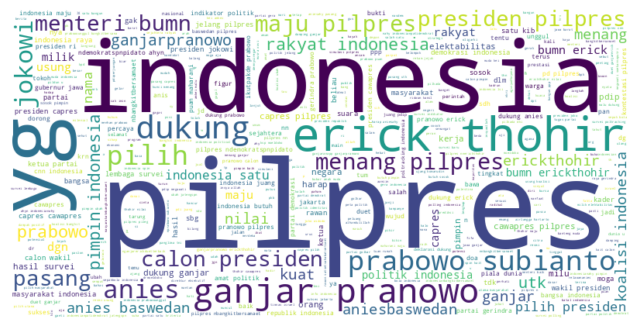

In [ ]:
# Mengisi nilai NaN dengan string kosong
df['Stemming data'] = df['Stemming data'].fillna('')

# Menggabungkan semua tweet menjadi satu string
data = ' '.join(df['Stemming data'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# ***TEXT REPRESENTATION***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('Hasil-Preprocessing-Data-Pilpres2024.csv')
    return data

data = load_data()
data.head(4)

Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1815 non-null   object 
 1   username       1761 non-null   object 
 2   Replies        1767 non-null   object 
 3   Retweets       1815 non-null   float64
 4   Stemming data  1814 non-null   object 
dtypes: float64(1), object(4)
memory usage: 71.1+ KB


In [ ]:
#menghapus kata "yg" dari teks dalam kolom tweet
data['Tweet'] = data['Stemming data'].str.replace('yg', '')
data.head(4)

Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   

                                       Stemming data  \
0                     bismillah ganjarpranowo utk ri   
1  bismilah ganjar pranowo tugiman moga tdk presi...   
2  kerozaok prabowo kalah pilpres rakyat indonesi...   
3  ganjar pranowo satu partai demokrasi indonesia...   

                                               Tweet  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...

In [ ]:
from collections import Counter

#mengidentifikasi 10 kata yang paling umum dengan frekuensi tertinggi
# Mengisi nilai NaN dengan string kosong
data['Tweet'] = data['Tweet'].fillna('')

cnt = Counter()
for text in data["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
common_words = cnt.most_common(10)
temp = pd.DataFrame(common_words, columns=['word', 'count'])
temp

word  count
0    pilpres   1778
1  indonesia   1610
2   presiden    473
3     ganjar    462
4    prabowo    415
5     dukung    409
6      erick    309
7     pimpin    306
8      pilih    301
9       maju    290

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

In [ ]:
data.head(10)

Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   
4  Sun Apr 30 13:48:06 +0000 2023     Alie_Fahnoor       1       4.0   
5  Sun Apr 30 13:39:43 +0000 2023     biruhitam_08       0       7.0   
6  Sun Apr 30 15:44:03 +0000 2023      bamantara00       0       5.0   
7  Sun Apr 30 20:15:00 +0000 2023        medcom_id       0       0.0   
8  Sun Apr 30 09:10:08 +0000 2023        Ini_ajunk       0       0.0   
9  Sun Apr 30 13:13:16 +0000 2023       AdiysSeven       0       0.0   

                                       Stemming data  \
0                     bismillah ganjarpranowo utk ri   
1  bismilah ganjar pranowo tugiman moga tdk presi...   
2  kerozaok prabowo kalah pilpres rakyat indonesi...   
3  ganjar pranowo satu partai demokrasi indonesia...   
4  jakarta cnn indonesia ketua partai gerindra pr...   
5  release poltracking indonesia simulasi paslon ...   
6  menteri bumn erick thohir figur cawapres elekt...   
7  partai golkar potensi gabung koalisi untun had...   
8  prabowo cawapres pilpres kantong cnn indonesia...   
9  datuakrajoangek ganjar vs prabowo jokowi ps ta...   

                                               Tweet  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...  
4  jakarta cnn indonesia ketua partai gerindra pr...  
5  release poltracking indonesia simulasi paslon ...  
6  menteri bumn erick thohir figur cawapres elekt...  
7  partai golkar potensi gabung koalisi untun had...  
8  prabowo cawapres pilpres kantong cnn indonesia...  
9  datuakrajoangek ganjar vs prabowo jokowi ps ta...

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#mengimpor tfidf sbg class dari kamus data sckit-learn
#mengubah teks menjadi vector
# Mengisi nilai NaN dengan string kosong
data['Stemming data'] = data['Stemming data'].fillna('')

# Menggunakan TfidfVectorizer untuk representasi vektor
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Stemming data'])

# Menampilkan hasil representasi vektor
print("Jumlah dokumen:", X.shape[0])
print("Jumlah fitur:", X.shape[1])
print(" ")
print("Representasi Vector:")
print(X.toarray())

Jumlah dokumen: 1816
Jumlah fitur: 6513
 
Representasi Vector:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
data.to_csv('Hasil-TextRepresentation.csv',encoding='utf8', index=False)

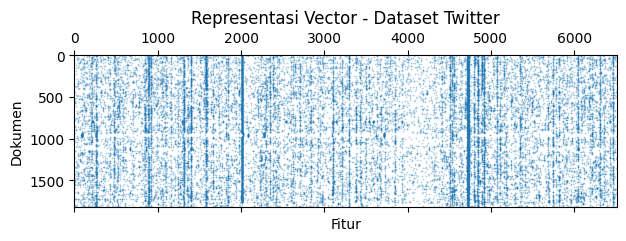

In [ ]:
# Plot representasi vektor tanpa PCA hanya menghasilkan plot matriks biner
# Principal Component Analysis
plt.figure(figsize=(7, 4))
plt.spy(X, markersize=0.1)
plt.xlabel('Fitur')
plt.ylabel('Dokumen')
plt.title('Representasi Vector - Dataset Twitter')
plt.show()

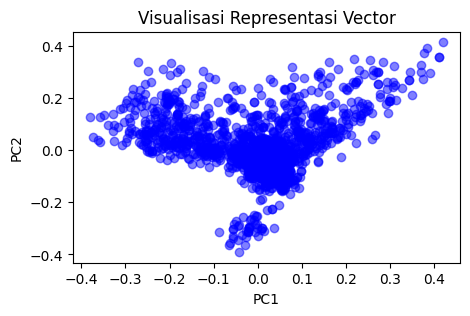

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Membuat plot
plt.figure(figsize=(5, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', alpha=0.5)
plt.title('Visualisasi Representasi Vector')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ***K-MEANS CLUSTERING***

In [ ]:
from sklearn.cluster import KMeans

#class K-Means dari kamus sklearn
# Membagi jumlah cluster terbaik menggunakan metode elbow
# Jumlah cluster maksimal yang akan dievaluasi
max_clusters = 10
inertia = []
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



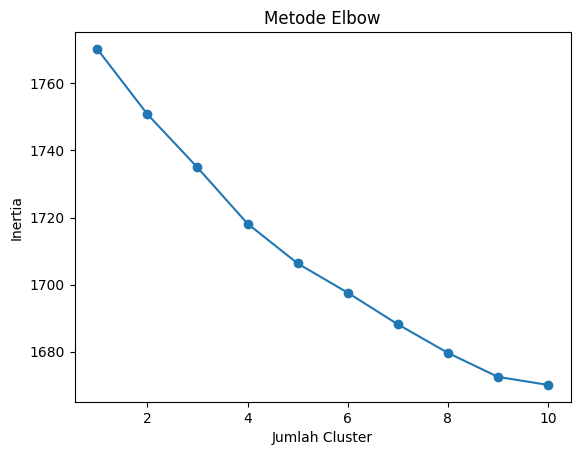

In [ ]:
# Plot metode elbow
#Tujuan dari plot ini adalah untuk mencari titik di mana penurunan inertia mulai melandai secara signifikan
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score tertinggi untuk berbagai jumlah kluster
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

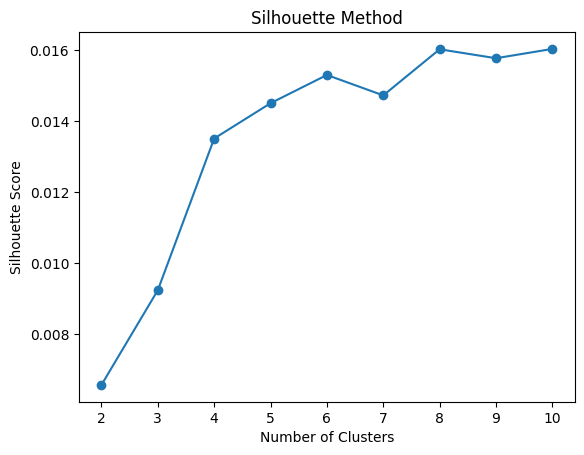

In [ ]:
# Membuat plot silhouette
#Tujuan dari plot ini adalah untuk mencari jumlah kluster yang memberikan nilai silhouette score tertinggi, yang menunjukkan bahwa data secara konsisten dan baik dikelompokkan dalam kluster tersebut.
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Menentukan Cluster dan memberikan label pada setiap teks tweet
# Melakukan clustering dengan k-means
kmeans = KMeans(n_clusters=10, max_iter=100, random_state=0)
kmeans.fit(X)

# Mendapatkan label klaster untuk setiap data
labels = kmeans.labels_

# Menambahkan kolom 'Cluster' ke DataFrame
data['Cluster'] = labels

data.head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Date         username Replies  Retweets  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong       1       3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi       1       1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD       0       0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa       0       0.0   

                                       Stemming data  \
0                     bismillah ganjarpranowo utk ri   
1  bismilah ganjar pranowo tugiman moga tdk presi...   
2  kerozaok prabowo kalah pilpres rakyat indonesi...   
3  ganjar pranowo satu partai demokrasi indonesia...   

                                               Tweet  Cluster  
0                     bismillah ganjarpranowo utk ri        1  
1  bismilah ganjar pranowo tugiman moga tdk presi...        2  
2  kerozaok prabowo kalah pilpres rakyat indonesi...        7  
3  ganjar pranowo satu partai demokrasi indonesia...        0

In [ ]:
df  = pd.DataFrame(data[['Tweet','Cluster']])
df.head(300)

Tweet  Cluster
0                       bismillah ganjarpranowo utk ri        1
1    bismilah ganjar pranowo tugiman moga tdk presi...        2
2    kerozaok prabowo kalah pilpres rakyat indonesi...        7
3    ganjar pranowo satu partai demokrasi indonesia...        0
4    jakarta cnn indonesia ketua partai gerindra pr...        3
..                                                 ...      ...
295  gus yaqut dapat ganjarerick pasang ideal pilpr...        9
296  gaet menang pilpres nnduo pasang ganjar pranow...        9
297  yurissasamosir anies jubir jokowi gub dki pung...        7
298  banding pasang nganjar pranowo amp erick thohi...        5
299  geloraco pilpres klo curang makan korban rakya...        1

[300 rows x 2 columns]

In [ ]:
df.to_csv('Hasil-KMeans-Clustering.csv',encoding='utf8', index=False)

# ***MEMBAGI CLUSTER EXPORT CSV***

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

#membagi 10 cluster untuk disimpan dalam format csv
# Baca dataset dari file CSV
dataset = pd.read_csv('Hasil-KMeans-Clustering.csv')

# Inisialisasi model K-Means dengan 10 cluster
kmeans = KMeans(n_clusters=10)

# Membuat dictionary untuk menyimpan setiap cluster
cluster_data = {}

# Loop untuk mengumpulkan setiap cluster
for cluster_id in range(10):
    # Filter dataset berdasarkan cluster
    cluster_data[cluster_id] = dataset[dataset['Cluster'] == cluster_id]

# Loop untuk menyimpan setiap cluster ke file CSV
for cluster_id, data in cluster_data.items():
    # Simpan cluster ke file CSV
    data.to_csv(f'cluster_{cluster_id}.csv', index=False)

# ***C-1***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_0 = pd.read_csv('cluster_0.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_0.head(4)

Tweet  Cluster
0  ganjar pranowo satu partai demokrasi indonesia...        0
1  partai golkar potensi gabung koalisi untun had...        0
2  sinergi partai demokrasi indonesia juang parta...        0
3  breaking newsnndukung ganjar bacapres pilpres ...        0

In [ ]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    68 non-null     object
 1   Cluster  68 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
#Hasil Cluster 1
from collections import Counter
cnt = Counter()
for text in cluster_0["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    koalisi     87
1       satu     74
2  indonesia     74
3    pilpres     66
4     partai     53
5        kib     42
6   presiden     34
7        ppp     33
8     ganjar     31
9    pranowo     25

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

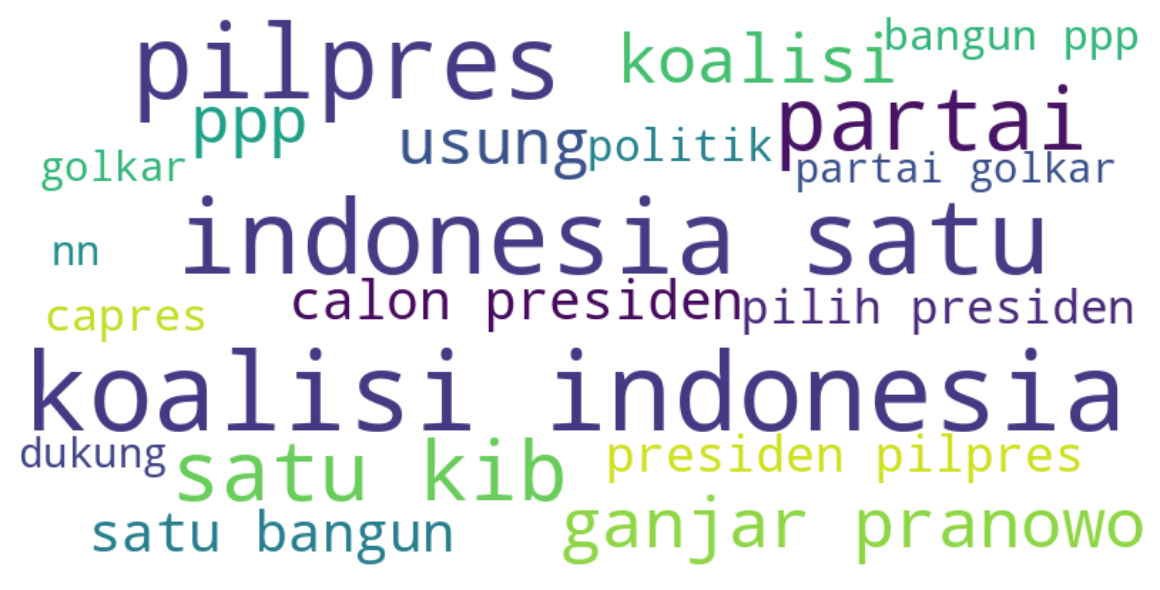

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_0['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-2***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_1 = pd.read_csv('cluster_1.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_1.head(4)

Tweet  Cluster
0                     bismillah ganjarpranowo utk ri        1
1  datuakrajoangek ganjar vs prabowo jokowi ps ta...        1
2  skg gua ga peduli pake ayat pake mayatmau bang...        1
3  ganjarpranowo komen baca ganjarpranowo capres ...        1

In [ ]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    502 non-null    object
 1   Cluster  502 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_1["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    pilpres    480
1  indonesia    473
2     jokowi    123
3     rakyat    115
4   presiden    107
5      pilih    103
6    politik    101
7     dukung     95
8     partai     78
9     menang     72

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

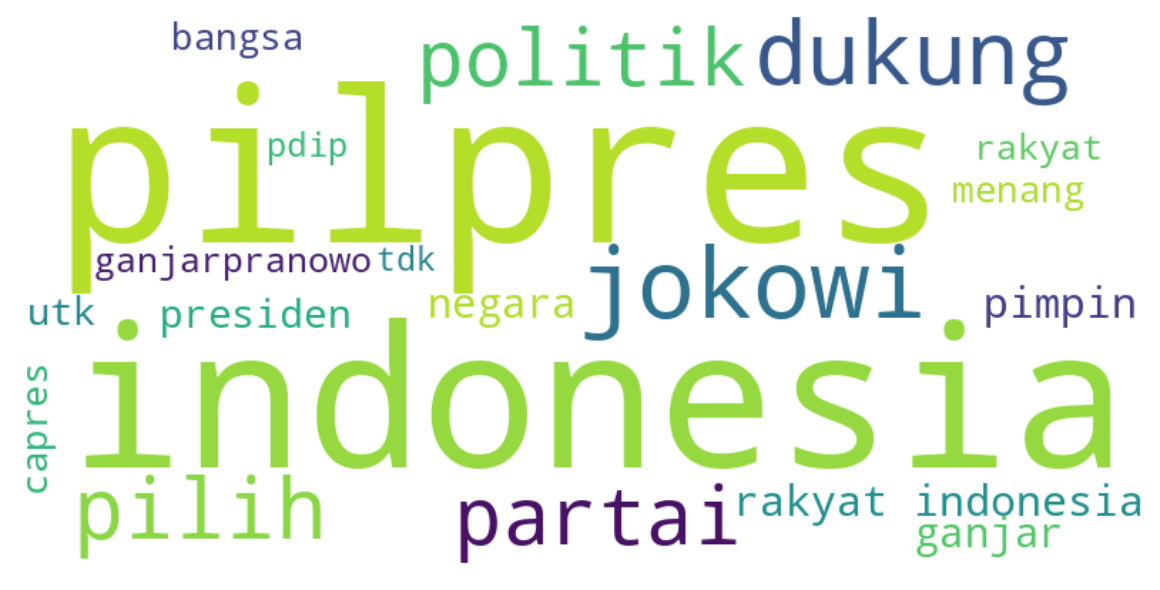

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_1['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud1.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-3***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_2 = pd.read_csv('cluster_2.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_2.head(4)

Tweet  Cluster
0  bismilah ganjar pranowo tugiman moga tdk presi...        2
1  ganjar menang pilpres pimpin rakyat presiden i...        2
2  dpd bmi banteng muda indonesia provinsi banten...        2
3  pdi juang sulsel menang ganjar pranowo preside...        2

In [ ]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    142 non-null    object
 1   Cluster  142 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_2["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0         ganjar    206
1        pilpres    143
2      indonesia    134
3        pranowo    132
4       presiden     70
5         dukung     61
6         menang     36
7  ganjarpranowo     34
8         pimpin     33
9          calon     32

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

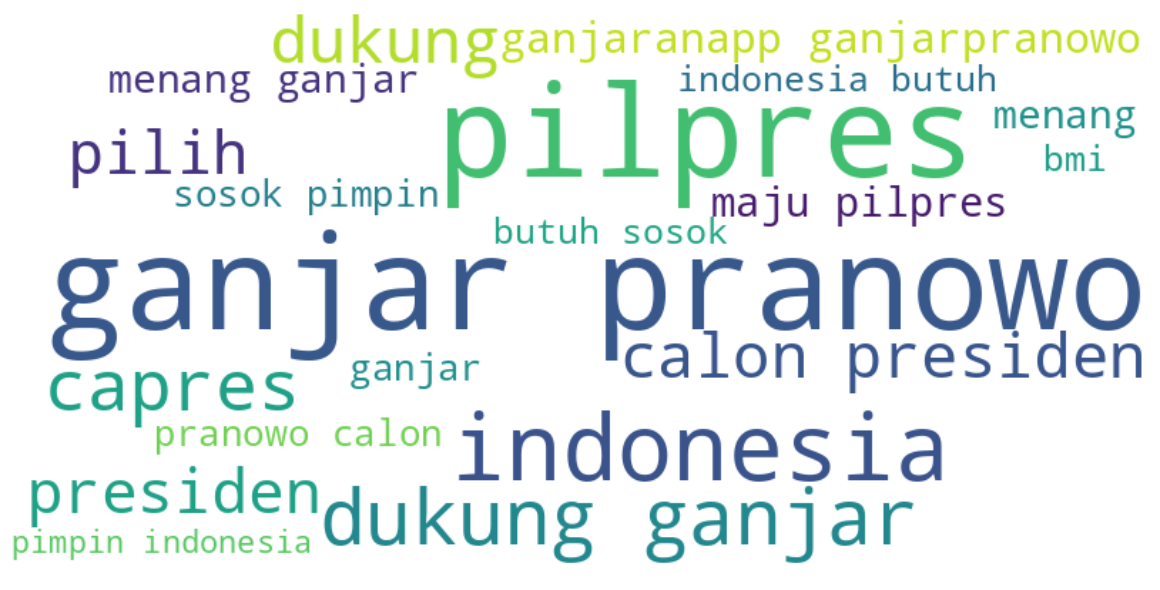

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_2['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud2.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-4***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_3 = pd.read_csv('cluster_3.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_3.head(4)

Tweet  Cluster
0  jakarta cnn indonesia ketua partai gerindra pr...        3
1  prabowo cawapres pilpres kantong cnn indonesia...        3
2  jakarta cnn indonesia ketua partai gerindra pr...        3
3  bahtiar bayang potensi pilih kalang anak muda ...        3

In [ ]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    132 non-null    object
 1   Cluster  132 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_3["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    prabowo    175
1   subianto    159
2  indonesia    134
3    pilpres    131
4   presiden     66
5   gerindra     60
6     partai     58
7  ikutpakde     55
8      ketua     38
9     dukung     31

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

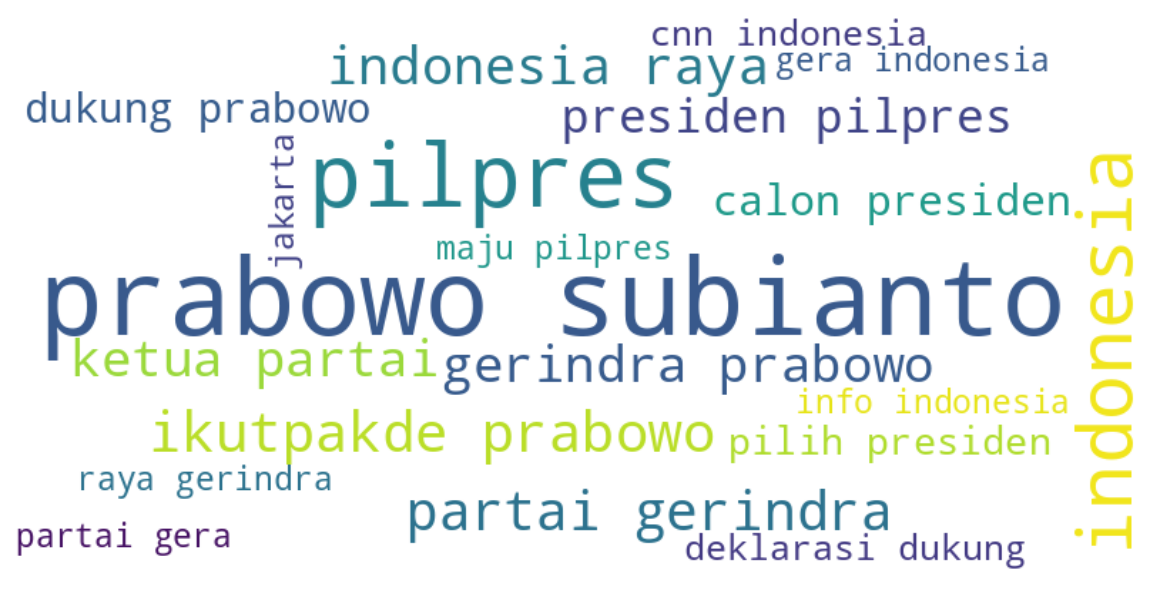

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_3['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud3.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-5***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_4 = pd.read_csv('cluster_4.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_4.head(4)

Tweet  Cluster
0  aniesbaswedan karniilyas insha allah anies men...        4
1  oposisicerdas pilpres gelar ninsya allah rakya...        4
2  salah baris dukung anies baswedan partai ummat...        4
3  jakarta pimpin anies nada ajar nnbahwa aniesba...        4

In [ ]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    157 non-null    object
 1   Cluster  157 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_4["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0          anies    220
1        pilpres    152
2      indonesia    140
3       baswedan     79
4         dukung     50
5  aniesbaswedan     48
6         menang     48
7       presiden     44
8          pilih     37
9           ubah     34

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

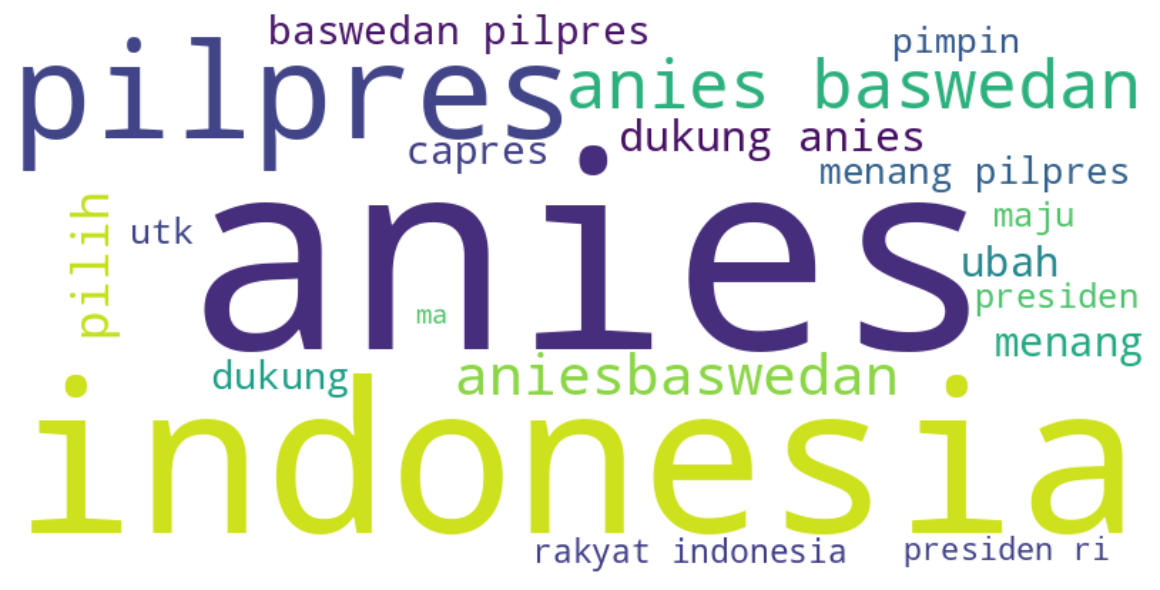

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_4['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud4.png', dpi=300)

# Tampilkan WordCloud
plt.show()



# ***C-6***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_5 = pd.read_csv('cluster_5.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_5.head(4)

Tweet  Cluster
0  mas et dongkrak elektabilitas pasang capresnya...        5
1  hasil lembaga survei menunjukn elektabilitas g...        5
2  poltracking indonesia survei simulasi nama kan...        5
3  lembaga survei poltracking indonesia ukur ting...        5

In [ ]:
cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    78 non-null     object
 1   Cluster  78 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_5["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0     survei    113
1    pilpres     82
2  indonesia     74
3      hasil     64
4    lembaga     47
5    prabowo     34
6   presiden     31
7     capres     28
8     thohir     26
9   subianto     26

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

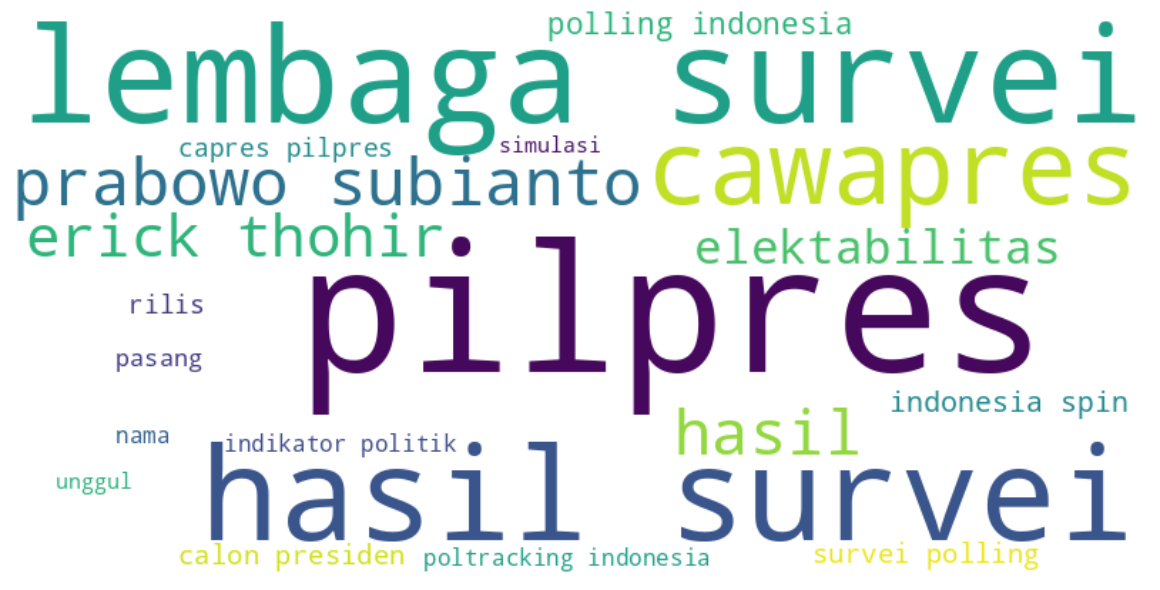

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_5['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud5.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-7***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_6 = pd.read_csv('cluster_6.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_6.head(4)

Tweet  Cluster
0  ahy peluang cawapres anies baswedan menang pil...        6
1  hasil survei ahy peluang damping anies pd pilp...        6
2  mahasiswa sulesi harap aniesahy pasang utk pil...        6
3  ahy harap rakyat aniesahy paslon baik pilpres ...        6

In [ ]:
cluster_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    47 non-null     object
 1   Cluster  47 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_6["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0                 pilpres     47
1               jatengspn     47
2                    ahyn     43
3      ndemokratspnpidato     41
4                aniesahy     33
5  indonesianpatidemokrat     24
6           indonesianahy     23
7                  pimpin     23
8                    ubah     23
9                     ahy     15

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

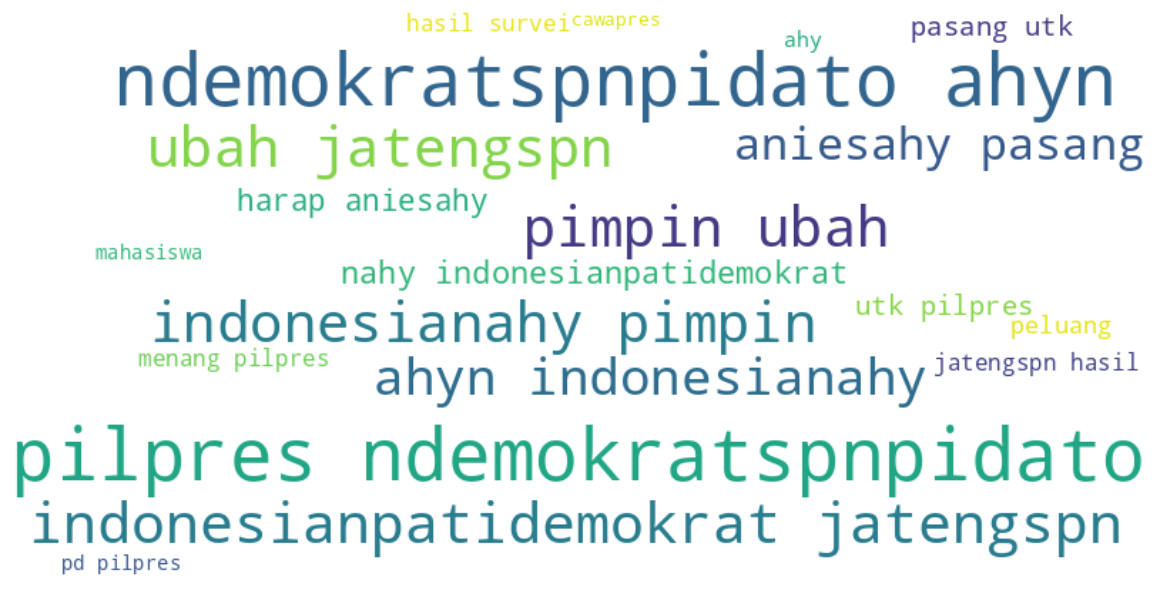

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_6['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud6.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-8***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_7 = pd.read_csv('cluster_7.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_7.head(4)

Tweet  Cluster
0  kerozaok prabowo kalah pilpres rakyat indonesi...        7
1  pilpres tinggal tokoh usung calon presiden pil...        7
2  marquez prediksi  sesuai poling netigen disemy...        7
3                                                NaN        7

In [ ]:
cluster_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    381 non-null    object
 1   Cluster  383 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [ ]:
from collections import Counter

# Mengisi nilai NaN dengan string kosong
cluster_7['Tweet'] = cluster_7['Tweet'].fillna('')

cnt = Counter()
for text in cluster_7["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
common_words = cnt.most_common(10)
temp = pd.DataFrame(common_words, columns=['word', 'count'])
temp


word  count
0    pilpres    363
1  indonesia    298
2    prabowo    141
3       maju     70
4     dukung     65
5       puan     60
6     menang     50
7     ganjar     45
8   presiden     43
9     capres     33

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

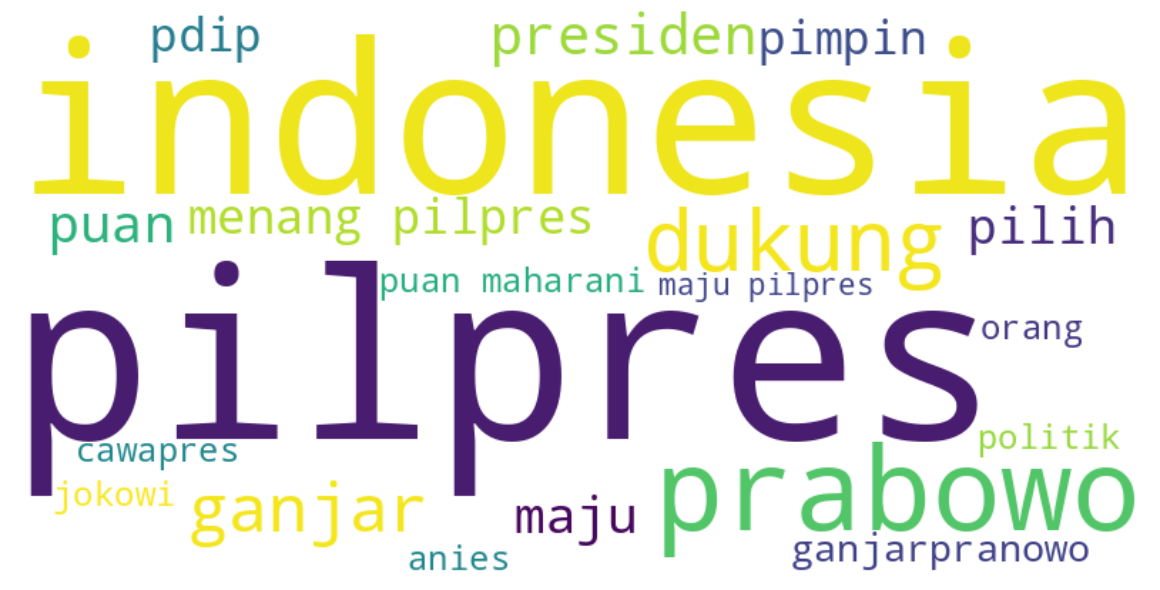

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_7['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud7.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-9***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_8 = pd.read_csv('cluster_8.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_8.head(4)

Tweet  Cluster
0  menteri bumn erick thohir figur cawapres elekt...        8
1  menteri bumn erick thohir figur cawapres dgn e...        8
2  survei ada poltracking indonesia elektabilitas...        8
3  amat politik perfekto indonesia amir faisal me...        8

In [ ]:
cluster_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    207 non-null    object
 1   Cluster  207 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_8["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      pilpres    208
1        erick    198
2    indonesia    190
3       thohir    175
4      menteri    128
5         bumn    122
6       pimpin    100
7  erickthohir     92
8     cawapres     87
9       dukung     77

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

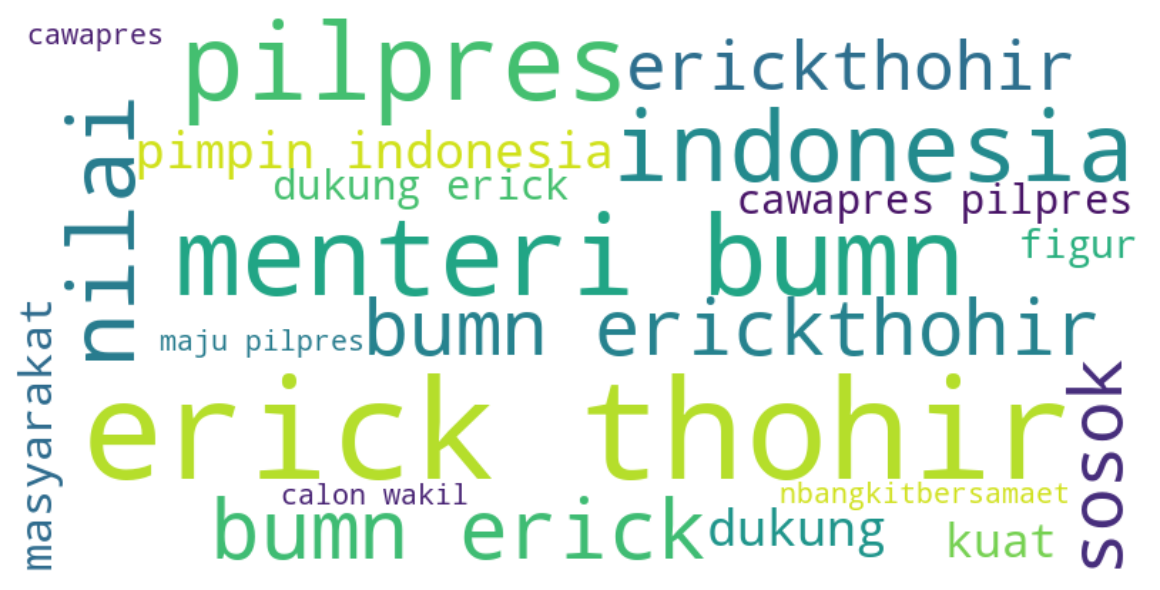

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_8['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud8.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-10***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_9 = pd.read_csv('cluster_9.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_9.head(4)

Tweet  Cluster
0  release poltracking indonesia simulasi paslon ...        9
1  ganjar pranowo erick thohir pimpin kompeten ma...        9
2  tum dpp foreder aidil fitri nilai duet ganjar ...        9
3  amat politik perfekto indonesia amir faisal me...        9

In [ ]:
cluster_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    100 non-null    object
 1   Cluster  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_9["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      pilpres    106
1    indonesia     93
2       pasang     91
3       ganjar     73
4         duet     62
5        erick     55
6      pranowo     46
7       thohir     43
8  erickthohir     37
9       capres     31

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

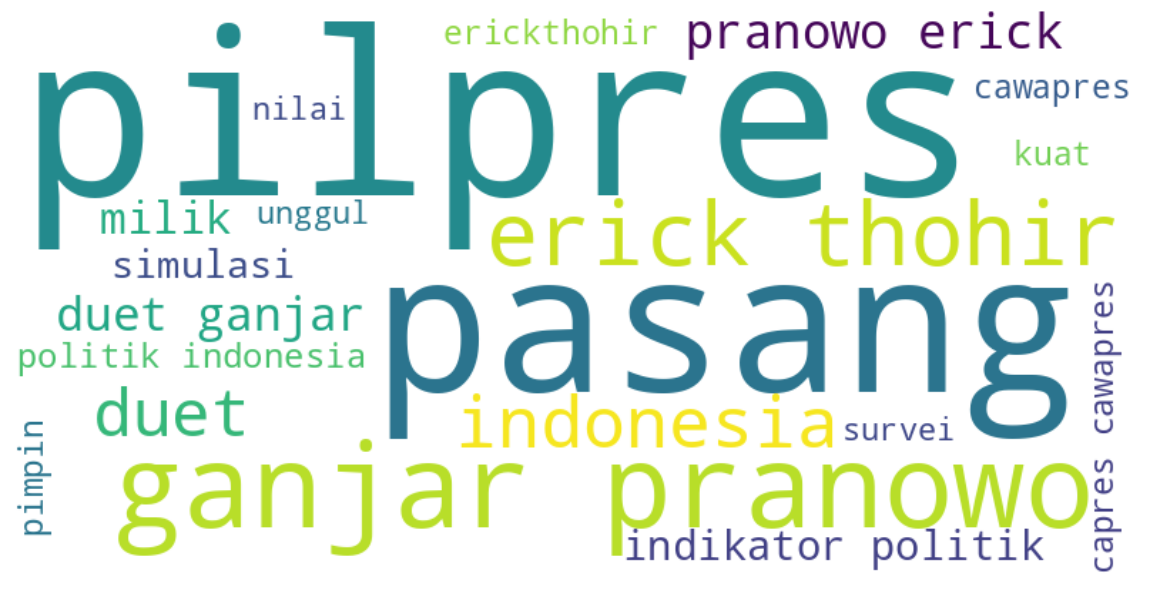

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_9['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud9.png', dpi=300)

# Tampilkan WordCloud
plt.show()